In [23]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import phate
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%pylab inline


def compute_PCA(snp_matrix):
    pca = PCA(n_components=2)
    snp_pca = pca.fit_transform(snp_matrix)
    np.savetxt("../output/pca.projection.txt", snp_pca, fmt='%.5f')
    

def compute_Phate(snp_matrix):
    phate_op = phate.PHATE(n_pca=10, k=4, t=10, n_jobs=-2)
    snp_phate = phate_op.fit_transform(snp_matrix)
    np.savetxt("../output/phate.projection.txt", snp_phate, fmt='%.5f')


def kmeans(snp_data, label, outfilename):
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(snp_data)
    y_kmeans = kmeans.predict(snp_data)
    fig = plt.figure(figsize=(8,8),dpi=75)
    ax = fig.add_subplot(111)
    ax.scatter(snp_data[:, 0], snp_data[:, 1], c=y_kmeans, s=30, alpha=0.4)
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_xlabel(label + " 1", size=15)
    ax.set_ylabel(label + " 2", size=15)
    plt.title('Clusters found by KMeans', fontsize=24)
    fig.savefig(outfilename, bbox_inches='tight')


def gmm(snp_data, label, outfilename):
    gmm = GaussianMixture(n_components=5)
    gmm.fit(snp_data)
    y_gmm = gmm.predict(snp_data)
    fig = plt.figure(figsize=(8,8),dpi=75)
    ax = fig.add_subplot(111)
    ax.scatter(snp_data[:, 0], snp_data[:, 1], c=y_gmm, s=30, alpha=0.4)
    ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, alpha=0.8)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_xlabel(label + " 1", size=15)
    ax.set_ylabel(label + " 2", size=15)
    plt.title('Clusters found by GMM', fontsize=24)
    fig.savefig(outfilename, bbox_inches='tight')


def plot_projection(snp_data, label, outfile):
    snp_data = np.transpose(snp_data)
    p1 = snp_data[0]
    p2 = snp_data[1]
    fig = plt.figure(figsize=(8,8),dpi=75)
    ax = fig.add_subplot(111)
    ax.scatter(p1, p2, color=colors, s=5)
    ax.set_xlabel(label + " 1", size=15)
    ax.set_ylabel(label + " 2", size=15)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]
    ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 1.05))
    plt.title(label + ' Projection', fontsize=24)
    fig.savefig(outfile, bbox_inches='tight')


Populating the interactive namespace from numpy and matplotlib


In [ ]:
snp_matrix = np.loadtxt("../input/merged.tab")
snp_matrix = np.transpose(snp_matrix)

In [ ]:
#Run PCA
compute_PCA(snp_matrix)

In [ ]:
#Run PHATE
compute_Phate(snp_matrix)

In [31]:
#Load projection data

pca_snp_data = np.loadtxt("../output/pca.projection.txt")
phate_snp_data = np.loadtxt("../output/phate.projection.txt")
tsne_snp_data = np.load("../output/tsne.projection.npy", allow_pickle=True)
tsne_snp_data = tsne_snp_data.item().embedding_

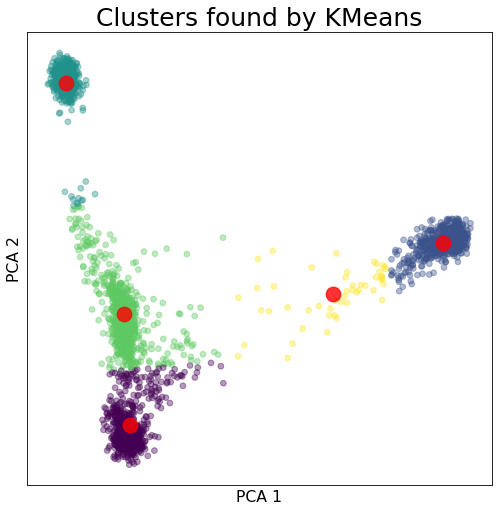

In [17]:
#Running KMeans for pca

kmeans(pca_snp_data, "PCA", "../output/kmeans_pca.png")

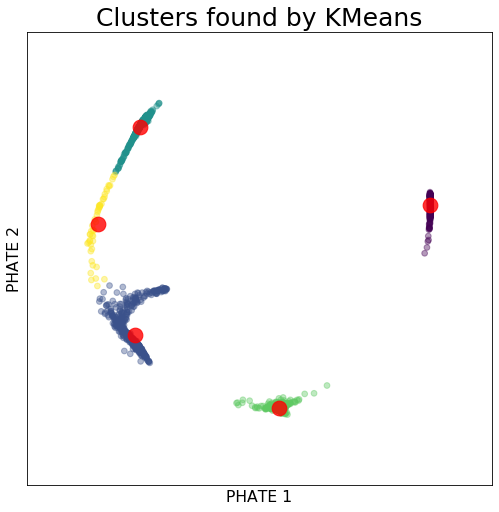

In [10]:
#Running KMeans for phate

kmeans(phate_snp_data, "PHATE", "../output/kmeans_phate.png")

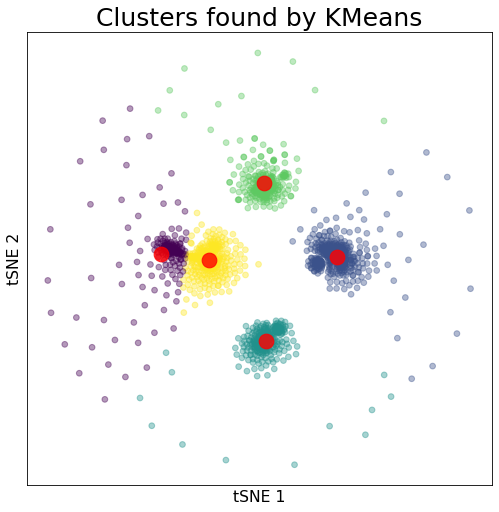

In [32]:
#Running KMeans for tsne

kmeans(tsne_snp_data, "tSNE", "../output/kmeans_tsne.png")

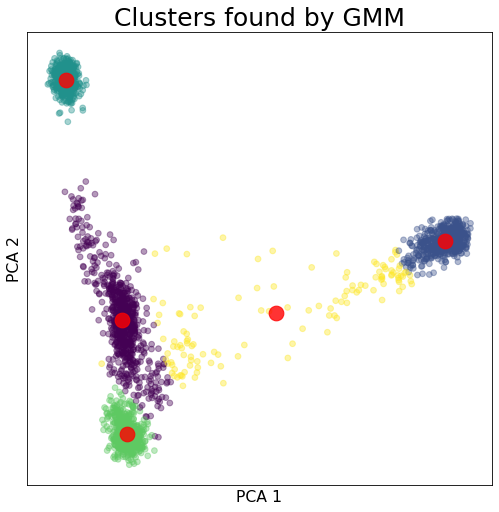

In [21]:
#Running GMM for pca

gmm(pca_snp_data, "PCA", "../output/gmm_pca.png")

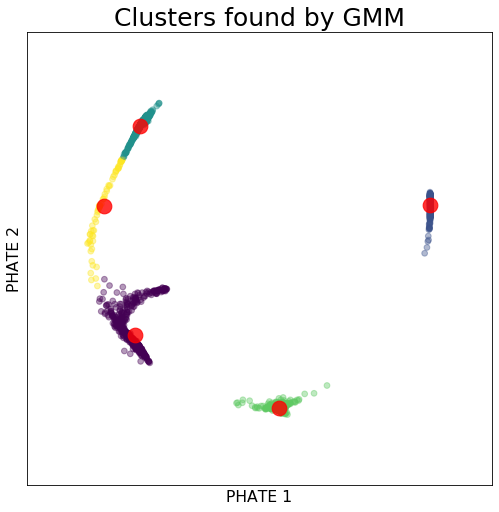

In [22]:
#Running GMM for phate

gmm(phate_snp_data, "PHATE", "../output/gmm_phate.png")

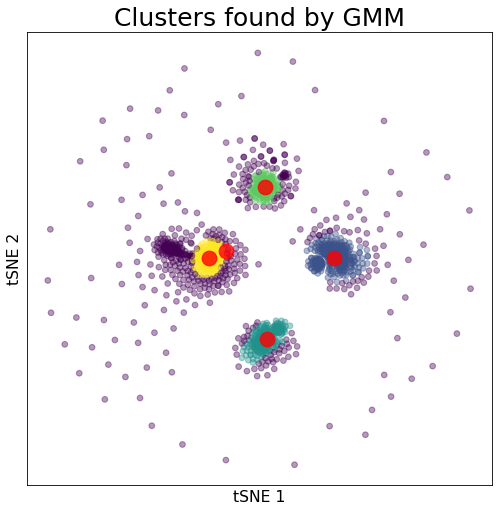

In [35]:
#Running GMM for tsne

gmm(tsne_snp_data, "tSNE", "../output/gmm_tsne.png")

In [14]:
sample_to_pop = {}
with open("../input/reference_labels.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

# Recommended colors for each population group
pop_to_color = {"YRI": "blue", "LWK": "blue", "GWD": "blue", 
                "MSL": "blue", "ESN": "blue", "ACB": "blue", "ASW": "blue",  
                "CDX": "green", "CHB": "green", "CHS": "green", "JPT": "green", "KHV": "green",
                "CEU": "yellow", "FIN": "yellow", "GBR": "yellow", "IBS": "yellow", "TSI": "yellow",
                "CLM": "purple", "MXL": "purple", "PEL": "purple", "PUR": "purple",
                "GIH": "orange", "BEB": "orange", "ITU": "orange", "PJL": "orange", "STU": "orange",
                "None": "gray"    
               }

samples = [item.strip() for item in open(os.path.join("../input/", "samples.txt"), "r").readlines()]
colors = []
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    color = pop_to_color[pop]
    colors.append(color)

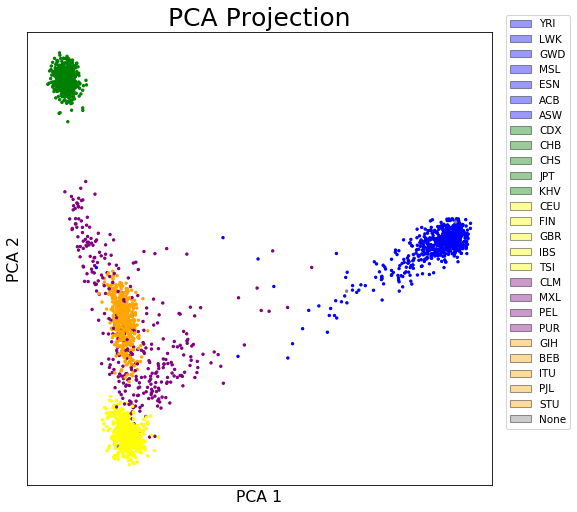

In [19]:
plot_projection(pca_snp_data, "PCA", "../output/pca.png")

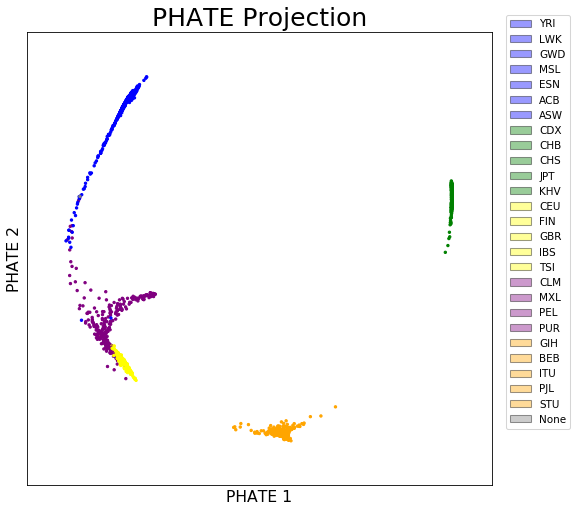

In [15]:
plot_projection(phate_snp_data, "PHATE", "../output/phate.png")

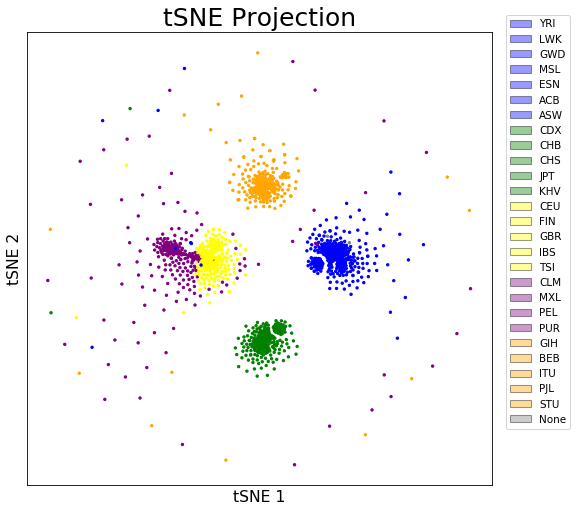

In [34]:
plot_projection(tsne_snp_data, "tSNE", "../output/tSNE.png")